# Gradient Descent:
**It is an optimization algorithm for finding a local minima of a differential equation. Take repeated steps to opposite direction of gradient of the function because this is the direction of steepest descent.**

## Types:
1. `Batch GD:` Iterate over each row of input data and update value of slope and intercept once only. Advantage: Works well on covex functions.Disadvantage: Huge amount of computational power required, it is slow, need to load entire training dataset in RAM for vectorization.
2. `Stochastic GD:` Iterate over each row and update the value of intercept and co-effecient. Advantage: Faster for larger dataset, can ue it over non-convex functions. Disadvantage: Error prone.
3. `Mini Batch GD:` Iterate over a batch of input data and update values for intercepet and co-effecient. Advantage: Faster, can use over convex functions.

In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Creation

In [2]:
df = make_regression(n_samples=100, n_features=1, n_targets=1, shuffle=True, noise=60)
type(df)
input = df[0]
output = df[1].reshape(-1,1)

In [3]:
data = np.hstack((input, output))
data_df = pd.DataFrame(data, columns=['input', 'output'])
data_df.head()

,input,output
0,-0.995630,-74.963829
1,-2.634370,-129.498533
2,0.081142,17.856227
3,0.802461,-8.002916
4,-0.424305,-92.932077


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_df['input'], data_df['output'], random_state=42, test_size=.2)
print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data: {X_test.shape}, {y_test.shape}")

Shape of training data: (80,), (80,)
Shape of testing data: (20,), (20,)


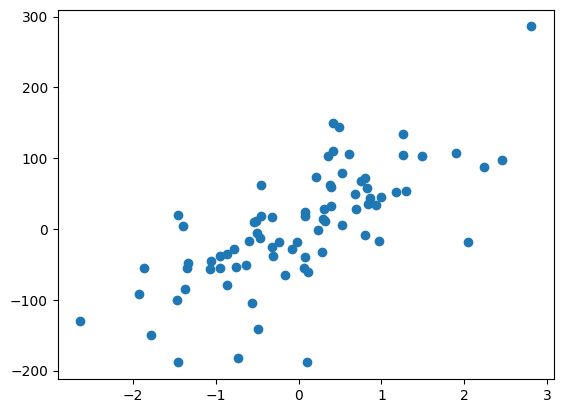

In [5]:
plt.scatter(X_train, y_train)
plt.show()

# Linear Regression

In [6]:
type(np.array(X_train))

numpy.ndarray

In [28]:
lr = LinearRegression()
m = lr.fit(np.array(X_train).reshape(-1,1), np.array(y_train))
m_y = lr.predict(np.array(X_test).reshape(-1,1))
print(f"Co-efficient is {m.coef_}. Intercept is {m.intercept_}")

Co-efficient is [56.07013468]. Intercept is 1.780762958437392


/tmp/ipython-input-14610572.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')


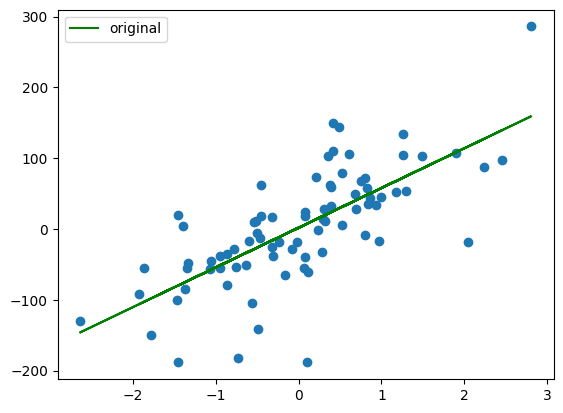

In [8]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.legend()
plt.show()

# Gradient Descent Start

1. Start from a random value of intercept
2. Got through different iterations and update intercept

/tmp/ipython-input-919752417.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
/tmp/ipython-input-919752417.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')


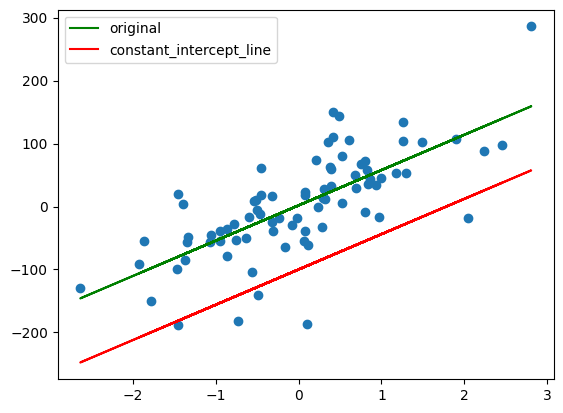

In [9]:
b = -100
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
plt.legend()
plt.show()

# Iteration 1

In [10]:
learning_rate = 0.01
slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b)
# slope_1
b_iter_1 = b - learning_rate*slope_1
b_iter_1

/tmp/ipython-input-3175563468.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b)


np.float64(62.849220733499834)

/tmp/ipython-input-61836920.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
/tmp/ipython-input-61836920.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
/tmp/ipython-input-61836920.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')


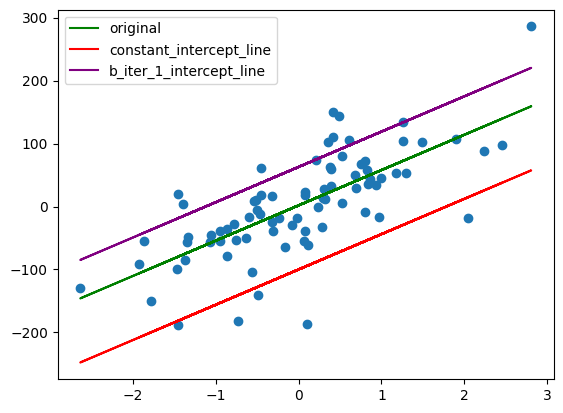

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')
plt.legend()
plt.show()

# Iteration 2

In [12]:
learning_rate = 0.01
slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b_iter_1)
# slope_1
b_iter_2 = b - learning_rate*slope_1
b_iter_2

/tmp/ipython-input-3169960607.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b_iter_1)


np.float64(-197.7095324400999)

/tmp/ipython-input-1970027843.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
/tmp/ipython-input-1970027843.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
/tmp/ipython-input-1970027843.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')
/tmp/ipython-input-1970027843.py:5: FutureWarning: Series.ravel is deprecated. T

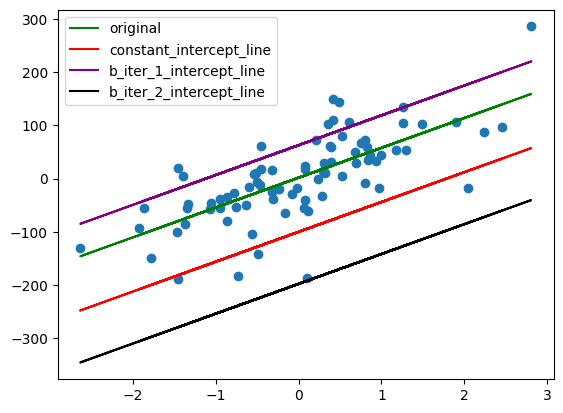

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_2, color='black', label='b_iter_2_intercept_line')
plt.legend()
plt.show()

# Iteration 3

In [14]:
learning_rate = 0.001
slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b_iter_2)
# slope_1
b_iter_3 = b - learning_rate*slope_1
b_iter_3

/tmp/ipython-input-2494082876.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  slope_1 = (-2) * np.sum(y_train - (m.coef_*X_train.ravel()) - b_iter_2)


np.float64(-68.08155273623403)

/tmp/ipython-input-1841753233.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
/tmp/ipython-input-1841753233.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
/tmp/ipython-input-1841753233.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')
/tmp/ipython-input-1841753233.py:5: FutureWarning: Series.ravel is deprecated. T

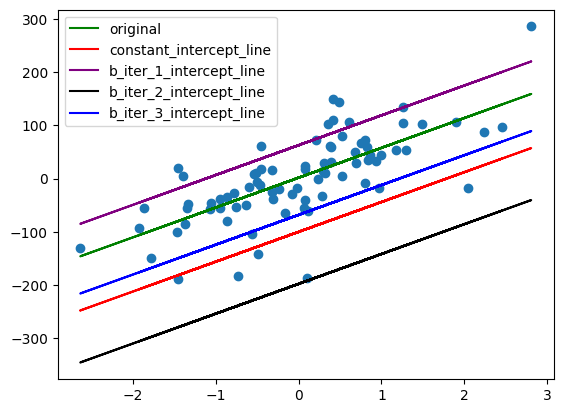

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b, color='red', label='constant_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_1, color='purple', label='b_iter_1_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_2, color='black', label='b_iter_2_intercept_line')
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + b_iter_3, color='blue', label='b_iter_3_intercept_line')
plt.legend()
plt.show()

# Using sklean Gradient Descent class

In [16]:
from sklearn.linear_model import SGDRegressor

/tmp/ipython-input-14610572.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')


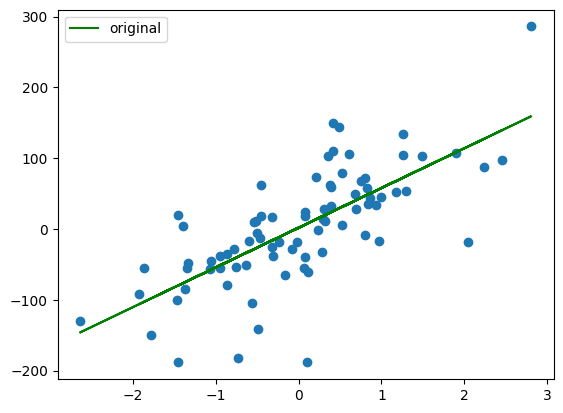

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.legend()
plt.show()

In [25]:
sgd = SGDRegressor(loss='squared_error')
sgd.fit(np.array(X_train).reshape(-1,1), y_train)
sgd_y = sgd.predict(np.array(X_test).reshape(-1,1))
print(f"Co-eff: {sgd.coef_}, Intercept: {sgd.intercept_}")

Co-eff: [56.00556243], Intercept: [1.77437879]


/tmp/ipython-input-2354719495.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
/tmp/ipython-input-2354719495.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(X_train.ravel(), sgd.coef_*X_train.ravel() + sgd.intercept_, color='red', label='SGD')


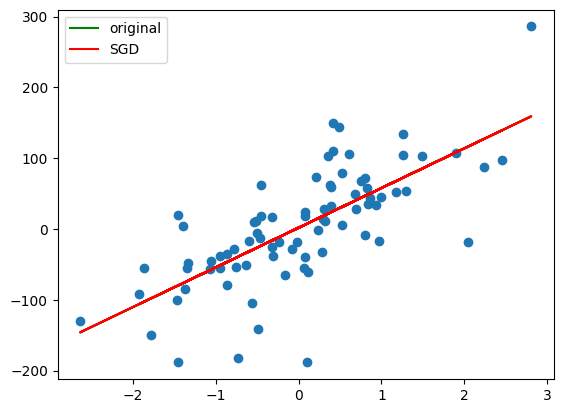

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train.ravel(), m.coef_*X_train.ravel() + m.intercept_, color='green', label='original')
plt.plot(X_train.ravel(), sgd.coef_*X_train.ravel() + sgd.intercept_, color='red', label='SGD')
plt.legend()
plt.show()

In [32]:
print(f"R2 score of LR: {round(r2_score(y_test, m_y), 4)*100}% and {round(r2_score(y_test, sgd_y), 4)*100}%")

R2 score of LR: 52.25% and 52.23%
